# Algorithms Coding Assignment 2
Submission Details:
- Name: Ashutosh Dayal
- Roll no.: `22EC30066`
- Start of work: 04-11-2024

**Note**: Please refer to the following link for detailed description of the algorithm used as a solution to the assignment. Not everything has been commented in the notebook itself, referral to the document is necessary to understand every part of it.

https://drive.google.com/file/d/1Q-HFRNyeMueIc5fGSy_-dRkOwDieRNsK/view?usp=sharing

Link to Colab Notebook: https://colab.research.google.com/drive/1jQ5Qx6PU9J1GNmxyc0ogrEUwY-zgQDBB?usp=sharing

### Problem Statement: Find Object in Random Matrix
**Task**: Given two 2D Random matrices, `mat1` and `mat2`. An object moves horizontally to the left in `mat2` from its initial position in `mat1`.

*Following constraints hold on the movement of object*:
1. Any point at index `p` in row `r` of matrix mat1 will always match to a point which is also in row `r` of matrix `mat2`. since the object moves horizontally to the left in `mat2`.
2. A point in `mat1` can match to no more than one point in `mat2`. To ensure this constraint holds, use a $3\times3$ window around a point  and use the mean square error as distance metric between two windows in `mat1` and `mat2`. For corner points modify this window to size $2\times2$, whereas for points that exist on the extreme left or extreme right of the matrix use a $2\times3$ window.
3. If a point in `mat1` at position `p` matches to point in `mat2` at position `q`, then subsequent point in `mat1` at position `p+1` will find its match, if the match exists, in `mat2` at position `q+j` such that `j`$>0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Following is cell that can be used for test case generation code (to be changed accordingly). Below is the second test case namely "RingOnBlock". Code has been taken from `ringblock.py` as given in the `Examples.zip` folder.

In [3]:
rows = 300
cols = 300

random_matrix = np.random.randint(256, size=(rows, cols))

p1 = np.zeros((rows, cols))
p2 = np.zeros((rows, cols))

p1[:,:] = random_matrix
p2[:,:] = random_matrix


pattern = np.random.randint(256, size=(rows, cols))
pattern2 = np.random.randint(256, size=(rows, cols))

offset=4
offset2=2

p1[rows//8:rows - rows//8, cols//8:cols - cols//8] = pattern2[rows//8:rows - rows//8, cols//8:cols - cols//8]
p2[rows//8:rows - rows//8, (cols//8)-offset2: cols-(cols//8)-offset2] = pattern2[rows//8:rows - rows//8, cols//8:cols - cols//8]

for i in range(rows):
    for j in range(cols):

        if ((rows//6)**2)<((i-rows//2)**2 + (j-cols//2)**2) <((rows//3)**2):
            p1[i,j] = pattern[i,j]
            if j-offset>=0:
                p2[i,j-offset] = pattern[i,j]

In [4]:
mat2,mat1=p2,p1

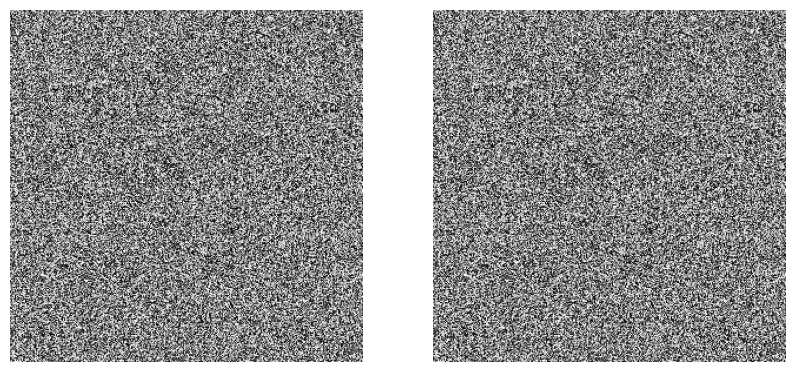

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(mat1,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(mat2,cmap='gray')

In [6]:
assert(mat1.shape==mat2.shape)
n,m=mat1.shape # Size of the images

#Used for traversing neigbouring pixels of a cell
Dx=[0, 0, 1, -1, 0, 1, -1, -1, 1]
Dy=[0, 1, 0, 0, -1, 1, -1, 1, -1]

In [7]:
M=1000000007 #Modulo domain used for program
HH_=100000073 #Polynomial hashing constant

## Solution 1 - Brute Force
Given $n$ is height and $m$ is width of the image
- Time complexity: $O(nm^2)$
- Memory complexity: $O(nm)$

In [8]:
def is_match(mat1,mat2,i,j,a,b): #O(1)
    for k in range(9):
        ni,nj,na,nb=i+Dx[k],j+Dy[k],a+Dx[k],b+Dy[k]
        if 0<=ni<n and 0<=nj<m and 0<=na<n and 0<=nb<m:
            if mat1[ni,nj]!=mat2[na,nb]: return 0
    return 1

In [22]:
def get_mask_1(mat1, mat2): #O(nm^2)
  res=np.zeros_like(mat1,dtype='int64')
  for i in range(0,n-1): #Iterate over each row
    for j in range(m-1,-1,-1): #Check for each index in mat2
      for k in range(j,m):
        if is_match(mat1,mat2,i,k,i,j): #Whether there exists some k>=j in mat1, which matches?
          res[i,j]=k-j
  return res

CPU times: user 18.7 s, sys: 7.5 ms, total: 18.8 s
Wall time: 19.5 s


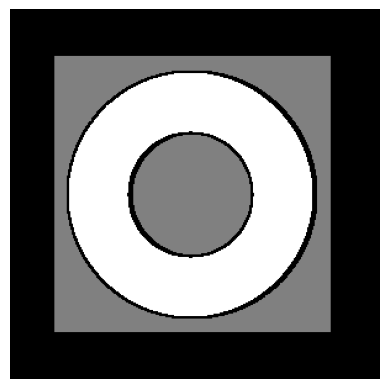

In [23]:
%%time
out_=get_mask_1(mat1,mat2)
plt.axis('off')
plt.imshow(out_,cmap='gray')

## Solution 2 - Optimal Solution
Given $n$ is height and $m$ is width of the image
- Time complexity: $O(nm)$ (Assuming Python `dictionary` is a hashmap (like `unordered_map` in C++), otherwise it will be $O(nmlogm)$ if it is implemented using Red Black Trees (like `map` in C++).)
- Memory complexity: $O(nm)$

###Binary exponentiation
Binary exponentiation is an efficient algorithm to calculate $a^b$ for given $a$ and $b$ using $O(log b)$ multiplications.
Recursive formulation:
\begin{equation}
a^b =
\begin{cases}
1 & \text{if } b = 0 \\
a \cdot a^{b-1} & \text{if } b \text{ is odd} \\
(a \cdot a)^{\frac{b}{2}} & \text{if } b \text{ is even}
\end{cases}
\end{equation}
The code has been written in an iterative fashion, as explained in the Algorithms classes.

For reference, https://cp-algorithms.com/algebra/binary-exp.html

> Note that every calculation in the program is done is modulo domain $M=1000000007$, which is a prime for minimal collision.



In [11]:
def binpow(a, b):
  a %= M
  res = 1
  while b>0:
    if b&1: res = res * a % M
    a = a * a % M
    b >>= 1
  return res

The following portion is this notebook is explained in detailed in the attached writup of the solution. Link is given below for reference (also submitted along with the notebook in Classroom):


In [12]:
pr=[binpow(HH_,i) for i in range(9)] #Used as prime coefficients

The following `hash_mat` function is used to generate a unique matrix representation of the matrix (grayscale image), such that the MSE condition given in Constrain `2` of the problem statement is held via direct comparison.

In [13]:
def hash_mat(mat): #O(nm)
  res=np.zeros_like(mat,dtype='int64')
  for i in range(1,n-1):
    for j in range(1,m-1):
      for k in range(9):
        res[i,j]=(res[i,j]+mat[i+Dx[k],j+Dy[k]]*pr[k]%M)%M
  return res

The following `get_mask` function is the implementation of the main algorithm described in the writeup.

In [24]:
def get_mask_2(mat1, mat2): #O(nm)
  m1,m2=hash_mat(mat1),hash_mat(mat2)
  res=np.zeros_like(m1,dtype='int64')
  for i in range(1,n-1): #This runs n-1 times
    dd={}
    for j in range(m-2,0,-1): #This runs m-1 times
      dd[m1[i,j]]=j # O(1)
      if m2[i,j] in dd: res[i,j]=dd[m2[i,j]]-j # O(1) operation - hashmap
  return res

CPU times: user 2.86 s, sys: 2.12 ms, total: 2.86 s
Wall time: 2.91 s


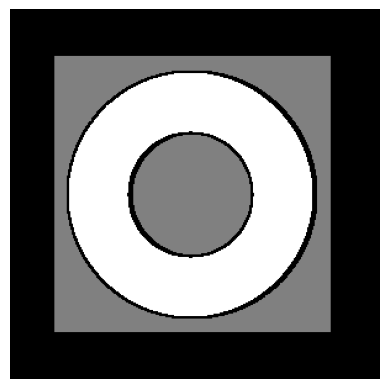

In [25]:
%%time
out_=get_mask_2(mat1,mat2)
plt.axis('off')
plt.imshow(out_,cmap='gray')